# 1. Exploration

## Variables d'environnement

In [26]:
TWEETS_PATH = 'data/training.1600000.processed.noemoticon.csv'

## Imports des dépendances

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Import du jeu de données

In [28]:
columns_names = ['target', 'id', 'date', 'flag', 'user', 'text']
tweets_df = pd.read_csv(TWEETS_PATH, encoding='ISO-8859-1', names=columns_names)

del columns_names

## Analyse des données

In [29]:
tweets_df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [30]:
print(f"Valeurs uniques de target : {tweets_df['target'].unique()}")

Valeurs uniques de target : [0 4]


Par soucis de lisibilité, nous allons remplacer les valeurs de target par 0 et 1 : 0 -> négatif, 4 -> positif

In [31]:
tweets_df['target'] = tweets_df['target'].replace(4, 1)
print(f"Valeurs uniques de target : {tweets_df['target'].unique()}")

Valeurs uniques de target : [0 1]


### Distributions des sentiments

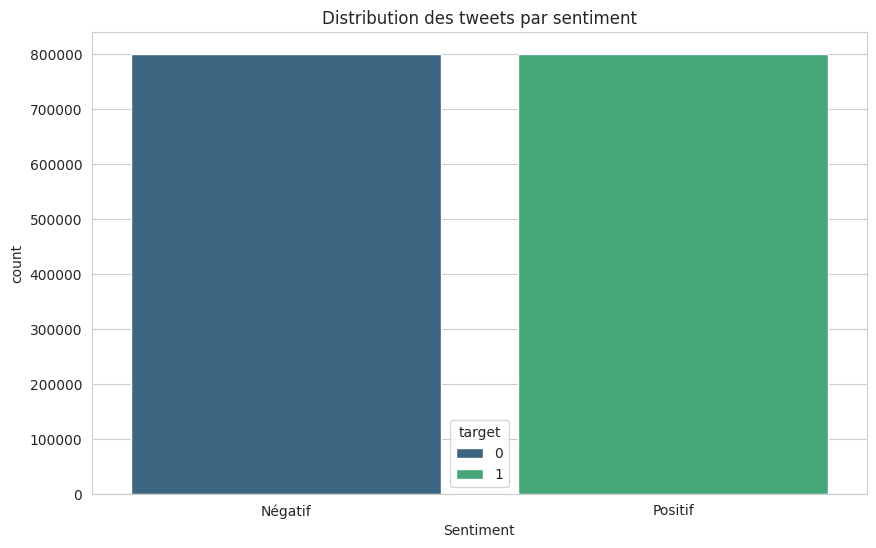

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=tweets_df, x='target', hue='target', palette='viridis')
plt.title('Distribution des tweets par sentiment')
plt.xticks(ticks=[0, 1], labels=['Négatif', 'Positif'])
plt.xlabel('Sentiment')
plt.show()

In [33]:
tweets_df['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

Nous pouvons constater que la variable target est équilibré :
- 800000 tweets négatifs
- 800000 tweets positifs

### Distributions temporelles des tweets

Date de début : Fri Apr 17 20:30:31 PDT 2009
Date de fin : Wed May 27 07:27:38 PDT 2009


/tmp/ipykernel_941/624038402.py:11: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  temp_df['date'] = pd.to_datetime(temp_df['date'], errors='coerce')


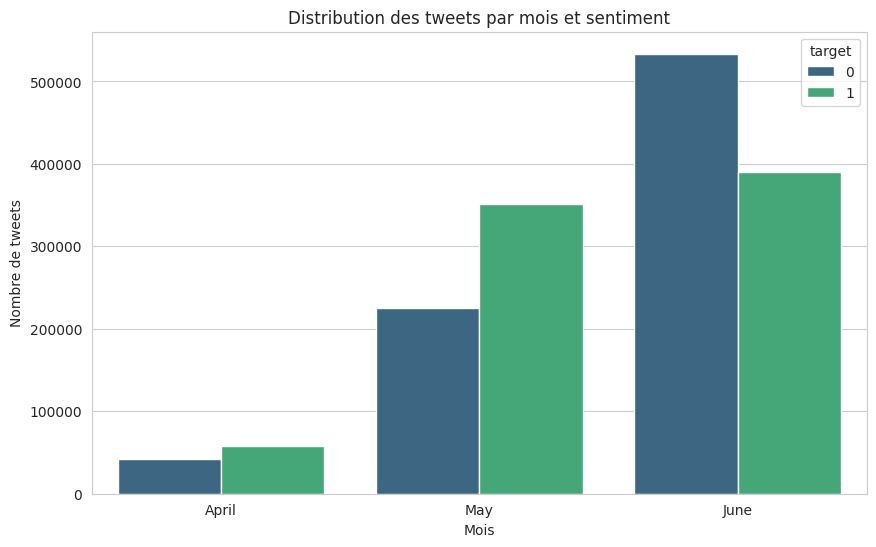

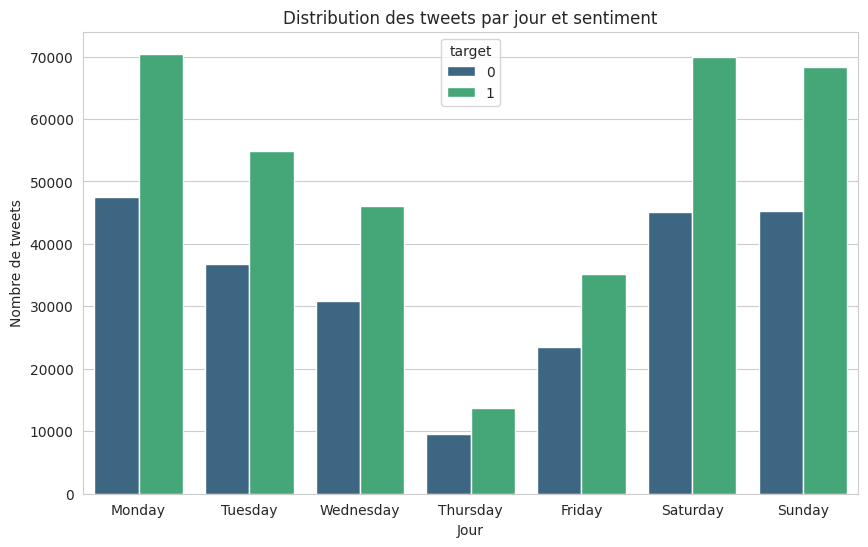

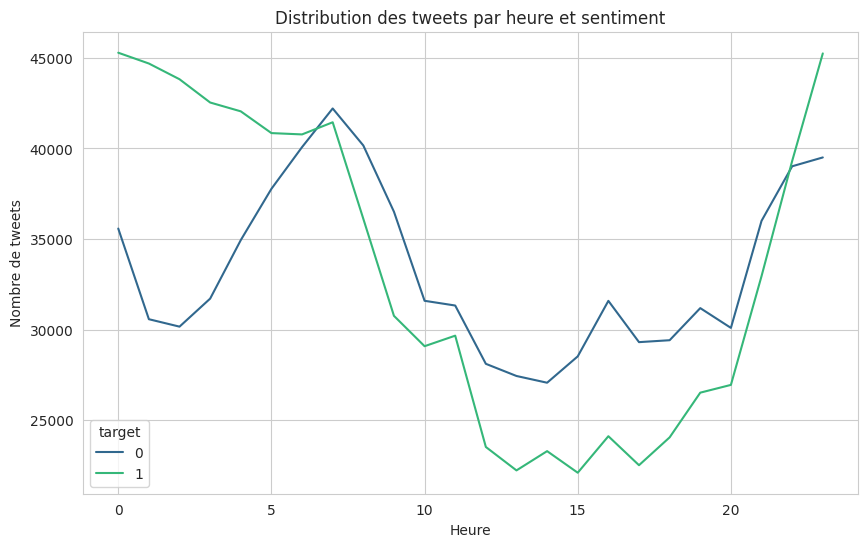

In [34]:
start_date = tweets_df['date'].min()
end_date = tweets_df['date'].max()
print(f"Date de début : {start_date}")
print(f"Date de fin : {end_date}")

month_map = {i: calendar.month_name[i] for i in range(1, 13)}
day_map = {i+1: calendar.day_name[i] for i in range(0, 7)}

temp_df = tweets_df.copy()

temp_df['date'] = pd.to_datetime(temp_df['date'], errors='coerce')
temp_df['year'] = temp_df['date'].dt.year
temp_df['month'] = temp_df['date'].dt.month
temp_df['day'] = temp_df['date'].dt.day
temp_df['hour'] = temp_df['date'].dt.hour
temp_df['weekday'] = temp_df['date'].dt.dayofweek

monthly_df = temp_df.groupby(['month', 'target']).size().reset_index(name='count')
monthly_df['month'] = monthly_df['month'].map(month_map)

daily_df = temp_df.groupby(['day', 'target']).size().reset_index(name='count')
daily_df['day'] = daily_df['day'].map(day_map)

hourly_df = temp_df.groupby(['hour', 'target']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_df, x='month', y='count', hue='target', palette='viridis')
plt.title('Distribution des tweets par mois et sentiment')
plt.xlabel('Mois')
plt.ylabel('Nombre de tweets')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=daily_df, x='day', y='count', hue='target', palette='viridis')
plt.title('Distribution des tweets par jour et sentiment')
plt.xlabel('Jour')
plt.ylabel('Nombre de tweets')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_df, x='hour', y='count', hue='target', palette='viridis')
plt.title('Distribution des tweets par heure et sentiment')
plt.xlabel('Heure')
plt.ylabel('Nombre de tweets')
plt.show()

del start_date
del end_date
del temp_df
del month_map
del day_map
del monthly_df
del daily_df
del hourly_df

### Distribution des utilisateurs

In [35]:
print(f"Nombre d'utilisateur unique : {tweets_df['user'].nunique()}")

Nombre d'utilisateur unique : 659775


In [36]:
del tweets_df